**Série 4**

Ce document contient les différents exercices à réaliser. Vous avez deux semaines pour compléter et soumettre cet exercice.

Pour chaque exercice:
* implémentez ce qui est demandé
* commentez votre code 
* expliquez **en français or English** ce que vous avez codé dans la cellule correspondante

## Contributions
*Exercice : [contribution Darmanger]*
- 1 : [100%]
- 2 : [100%]

## Exercice 1
Concevez un algorithme pour **énumérer tous les arbres binaires** d'une taille N donnée, où N correspond au nombre de noeuds (vertex) ; le N ne prend pas en compte les feuilles. Les noeuds feuilles sont représentés par ceci "(..)": une parenthèse ouverte '(', deux points '..' - représentant les deux feuilles- et une parenthèse fermée ')'.

Le programme final doit afficher la liste des arbres binaires de la taille spécifiée, un arbre par ligne. Pour N=3, il y a un total de 5 arbres binaires. L'output doit être une séquence de parenthèses et points, comme ceci:

    (((..).).)
    ((.(..)).)
    ((..)(..))
    (.((..).))
    (.(.(..)))
    
Implémentez et testez un algorithme récursif qui résout le problème. Donnez une solution pour N=[1,10]

Pour tester votre solution ("est-ce que la solution retourne le nombre correct d'arbres?"), vous devez lire, ~comprendre, implémenter et tester la formule qui calcule le nombre de Catalan pour un N donné:

C<sub>n</sub> = $\frac{(2n)!}{(n+1)!n!}$

Aide: https://fr.wikipedia.org/wiki/Nombre_de_Catalan

In [1]:
from math import factorial


def catalan_nb(n:int) -> int:
    # C_n = (2n)! / ((n+1)! * n!)
    return factorial(2 * n) // (factorial(n + 1) * factorial(n))

In [2]:
assert catalan_nb(3) == 5
assert catalan_nb(5) == 42
assert catalan_nb(8) == 1430

In [3]:
def get_all_B_Trees(n: int) -> list:
    """ Returns all possible binary trees with n internal nodes. """

    # Base case: if the tree has no internal nodes (n = 0),
    # there is only one possible structure, which is a leaf "."
    if n == 0:
        return ["."]
    
    # Base case: if the tree has exactly 1 internal node,
    # the only possibility is to have two leaves: "(..)"
    if n == 1:
        return ["(..)"]
    
    res = []

    # Loop through all ways to divide n into left and right subtrees
    # The left subtree will have i nodes
    # The right subtree will have (n - i - 1) nodes
    # The -1 is because the root node is counted as an internal node
    for i in range(n):
        # Recursively generate all subtrees with i nodes on the left
        sub_left = get_all_B_Trees(i)

        # Recursively generate all subtrees with (n - i - 1) nodes on the right
        # The quantity (n - i - 1) represents the remaining nodes after allocating i nodes to the left
        sub_right = get_all_B_Trees(n - i - 1)

        # Combine all possible left and right subtrees
        for left in sub_left:
            for right in sub_right:
                # Add the current tree to the result
                res.append(f"({left}{right})")

    return res

### Solutions
Ecrivez ci-dessous votre réponse pour N=[1,10]

In [4]:
trees = get_all_B_Trees(3)

In [5]:
for tree in trees:
    print(tree)

(.(.(..)))
(.((..).))
((..)(..))
((.(..)).)
(((..).).)


In [6]:
N = range(1, 11)
for n in N:
    print(f"Number of binary trees with {n} internal nodes: {len(get_all_B_Trees(n))}")
    print(f"Number of binary trees with {n} internal nodes (Catalan number): {catalan_nb(n)}")
    print()

Number of binary trees with 1 internal nodes: 1
Number of binary trees with 1 internal nodes (Catalan number): 1

Number of binary trees with 2 internal nodes: 2
Number of binary trees with 2 internal nodes (Catalan number): 2

Number of binary trees with 3 internal nodes: 5
Number of binary trees with 3 internal nodes (Catalan number): 5

Number of binary trees with 4 internal nodes: 14
Number of binary trees with 4 internal nodes (Catalan number): 14

Number of binary trees with 5 internal nodes: 42
Number of binary trees with 5 internal nodes (Catalan number): 42

Number of binary trees with 6 internal nodes: 132
Number of binary trees with 6 internal nodes (Catalan number): 132

Number of binary trees with 7 internal nodes: 429
Number of binary trees with 7 internal nodes (Catalan number): 429

Number of binary trees with 8 internal nodes: 1430
Number of binary trees with 8 internal nodes (Catalan number): 1430

Number of binary trees with 9 internal nodes: 4862
Number of binary tr

In [7]:
assert len(trees) == catalan_nb(3)
assert set(["(((..).).)", "((.(..)).)", "((..)(..))","(.((..).))","(.(.(..)))"]) == set(trees)

In [8]:
assert len(get_all_B_Trees(4)) == catalan_nb(4)
assert len(get_all_B_Trees(5)) == catalan_nb(5)
assert len(get_all_B_Trees(6)) == catalan_nb(6)
assert len(get_all_B_Trees(7)) == catalan_nb(7)
assert len(get_all_B_Trees(8)) == catalan_nb(8)

### Explications
Expliquez comment votre algorithme fonctionne

L'algorithme est basé sur la récursivité. Il prend en entrée un entier `n` qui représente le nombre de neuds internes de l'arbre binaire. Il retourne une liste de chaînes de caractères représentant tous les arbres binaires possibles avec `n` noeuuds internes. Avec la récurssion, l'algorithme décompose un arbre en sous-arbres plus petits, jusqu'à atteindre un cas de base. Il génère ensuite tous les arbres possibles pour chaque sous-arbre, puis combine ces arbres pour former des arbres plus grands. 

#### Cas de base :
-   **Cas de base 1 :** Si `n = 0`, il n'y a pas de noeud interne, donc le seul arbre possible est une feuille `"."`
-   **Cas de base 2 :** Si `n = 1`, il y a exactement un noeud interne, donc la seule structure possible est un noeud interne entouré de deux feuilles, représenté par `"(..)"`

#### Cas général (récursif) :
Lorsque `n > 1`, l'algorithme divise l'arbre en deux sous-arbres :
-   **Le sous-arbre gauche** avec `i` noeuds internes. 
    -   Génère tous les sous-arbres possibles pour le côté gauche avec i noeuds.
-   **Le sous-arbre droit** avec `n - i - 1` noeuds internes (-1 car un noeuds est utilisé pour la racine de l'arbre actuel). 
    -   Génère tous les sous-arbres possibles pour le côté droit avec n - i - 1 noeuds.

L'algorithm combine ensuite chaque sous-arbre gauche avec chaque sous-arbre droit pour former un nouvel arbre binaire sous la forme "*(SousArbreGauche SousArbreDroit)*"


### Exemple de fonctionnement pour N = 3

Pour `n = 3`, l'algorithme va :

1.  Essayer toutes les possibilités pour répartir les 3 noeuds entre le sous-arbre gauche et le sous-arbre droit.
2.  Les répartitions possibles sont :
    -   `i = 0` à gauche et `n - i - 1 = 2` à droite.
    -   `i = 1` à gauche et `n - i - 1 = 1` à droite.
    -   `i = 2` à gauche et `n - i - 1 = 0` à droite.

À chaque étape, il combine les sous-arbres générés pour créer des arbres complets. Cela finit par donner les 5 structures d'arbres pour `n = 3` :

    (((..).).)
    ((.(..)).)
    ((..)(..))
    (.((..).))
    (.(.(..)))

## Exercice 2
Qu'elle est la complexité en espace/temps de l'algorithme ? Une approximation asymptotique est recommandée. Vous aurez besoin de la formule de Stirling pour cela : $n ! \approx \sqrt{2 \pi n}\left(\frac{n}{\mathrm{e}}\right)^n$

### Analyse de la complexité de l'algorithme

L'algorithme génère tous les arbres binaires possibles avec $N$ noeuds internes. Il faut alors analyser la complexité en **temps** et en **espace**.

#### Complexité en temps

L'algorithme est récursif et génère chaque arbre binaire en explorant toutes les combinaisons possibles de sous-arbres gauche et droit. Pour une taille $n$ donnée, le nombre total d'arbres binaires est donné par le nombre de Catalan $C_n$ pour $n$ noeuds internes. La complexité temporelle de l'algorithme est donc liée à la taille de ce nombre de Catalan.

Le nombre de Catalan $C_n$ est défini comme :

$$
C_n = \frac{1}{n + 1} \binom{2n}{n} = \frac{(2n)!}{(n + 1)! n!}
$$

Maintenant on va approximer cette formule à l'aide de la **formule de Stirling**, qui permet d'approximer la factorielle pour des grands nombres :

$$
n! \approx \sqrt{2 \pi n} \left(\frac{n}{e}\right)^n.
$$

En appliquant cette approximation à chaque facteur dans la formule du nombre de Catalan, on obtient :

![Serie 4](./img/serie4.jpg)

Cela montre que le nombre de Catalan croît exponentiellement avec $n$. Puisque l'algorithme génère tous les arbres, la complexité temporelle est proportionnelle à $C_n$. Ainsi, la **complexité en temps** est :

$$
O(C_n) = O\left(\frac{4^n}{n^{3/2}}\right) \approx O(4^n).
$$

#### Complexité en espace

Pour évaluer la complexité en espace, on considère deux facteurs :
1. Le nombre total d'arbres générés, qui est $C_n$.
2. La taille de chaque arbre. Chaque arbre est représenté par une chaîne de parenthèses et de points, et la taille d'un arbre avec $n$ noeuds internes est de l'ordre de $O(n)$. 

   - Lors de l'appel récursif, l'algorithme stocke les sous-arbres gauche et droit, ce qui nécessite un espace proportionnel à la taille de ces sous-arbres. Cela signifie que pour chaque appel récursif, on doit allouer de l'espace pour conserver les représentations des arbres générés.
   - La taille maximale d'un arbre est atteinte lorsque tous les noeuds internes sont du côté gauche ou du côté droit, ce qui donne un arbre de profondeur $n$.


Le problème ici est de savoir combien de mémoire il faut pour stocker chaque arbre binaire généré. Pour cela, on regarde le nombre total de caractères nécessaires pour représenter chaque arbre. La mémoire nécessaire est donc directement proportionnelle au nombre de noeuds internes $n$, car chaque nœud interne contribue à la longueur de la chaîne de caractères. Cela est donc proportionnel à $O(n)$.


Ainsi, la complexité en espace est donnée par : *Nombre total d'arbres* x *Taille maximale d'un arbre*, car l'espace nécessaire est proportionnel à la taille de chaque arbre et au nombre total d'arbres générés. En utilisant l'approximation de Stirling pour le nombre de Catalan, on obtient :


$$
O(C_n \cdot n) = O\left(\frac{4^n}{n^{3/2}} \cdot n\right) = O\left(\frac{4^n}{n^{1/2}}\right) \approx O(4^n).
$$

#### Conclusion

- **Complexité en temps** : $O\left(\frac{4^n}{n^{3/2}}\right)$ = $O(4^n)$
- **Complexité en espace** : $O\left(\frac{4^n}{n^{1/2}}\right)$ = $O(4^n)$

Ces deux complexités montrent une croissance exponentielle avec un facteur de $4^n$, ce qui signifie que l'algorithme est **exponentiel** en temps et en espace. Bien que le terme $n^{-3/2}$ ou $n^{-1/2}$ réduise légèrement la croissance, la partie exponentielle $4^n$ domine, rendant l'algorithme rapidement coûteux pour de grandes valeurs de $n$.


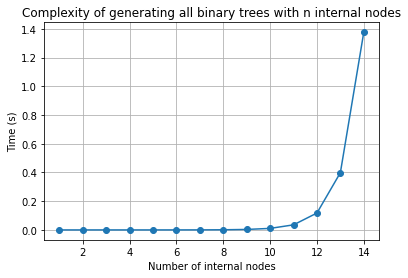

In [9]:
import matplotlib.pyplot as plt
import time
import sys

N = range(1, 15)
times = []
memories = []


for n in N:
    start_time = time.time()
    trees = get_all_B_Trees(n)
    end_time = time.time()
    memories.append(sys.getsizeof(trees))
    times.append(end_time - start_time)

plt.plot(N, times, marker='o')
plt.xlabel("Number of internal nodes")
plt.ylabel("Time (s)")
plt.title("Complexity of generating all binary trees with n internal nodes")
plt.grid()
plt.show()

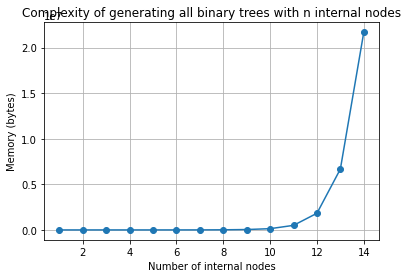

In [10]:
plt.plot(N, memories, marker='o')
plt.xlabel("Number of internal nodes")
plt.ylabel("Memory (bytes)")
plt.title("Complexity of generating all binary trees with n internal nodes")
plt.grid()
plt.show()